In [74]:
import pandas as pd
import requests
import json
import os

from utility import *

import matplotlib.pyplot as plt
import hvplot.pandas
import bokeh

### Get ticker selection from user

In [83]:
#use this for real time search
#selected_ticker = get_ticker([])

#use this to use the stored datasets
selected_ticker = get_ticker(['META','AAPL','AMZN','NFLX', 'GOOG', 'GOOGL'])

Select a ticker to analyze
1 - META
2 - AAPL
3 - AMZN
4 - NFLX
5 - GOOG
6 - GOOGL
----------------------------------------
AAPL


### Read Data for the selected ticker

In [84]:
data_ready = prepare_ticker_data(selected_ticker)

if(data_ready):
    stock_data_df = pd.read_csv(f"../Datasets/daily_{selected_ticker}.csv")
    stock_data_df

    stock_data_df.set_index('timestamp', drop=True, inplace=True)
    stock_data_df.sort_index(inplace=True)

stock_data_df.index = pd.to_datetime(stock_data_df.index)
stock_data_df.drop('Unnamed: 0', axis=1, inplace=True)
stock_data_df

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,80.00,80.69,77.370,77.62,2487300
1999-11-02,78.00,81.69,77.310,80.25,3564600
1999-11-03,81.62,83.25,81.000,81.50,2932700
1999-11-04,82.06,85.37,80.620,83.62,3384700
1999-11-05,84.62,88.37,84.000,88.31,3721500
...,...,...,...,...,...
2023-12-22,195.18,195.41,192.970,193.60,37149570
2023-12-26,193.61,193.89,192.830,193.05,28919310
2023-12-27,192.49,193.50,191.090,193.15,47899806


### Plot the close price with all available data to see how is the trend

<Axes: xlabel='timestamp'>

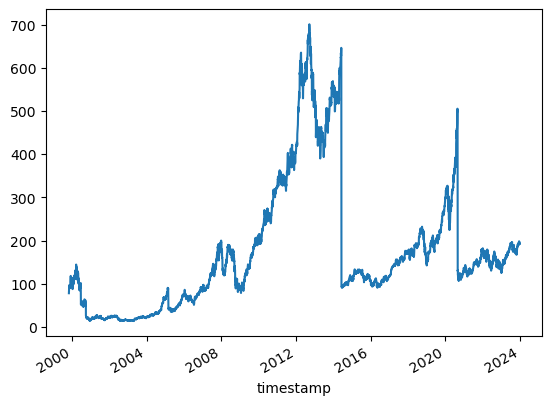

In [85]:
stock_data_df['close'].plot()

/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/element/chart.py:254: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for (key, sdf), element_vdims in zip(df.groupby(level=levels, sort=False), vdims):
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as

:NdOverlay   [Variable]
   :Area   [timestamp]   (value,Baseline)

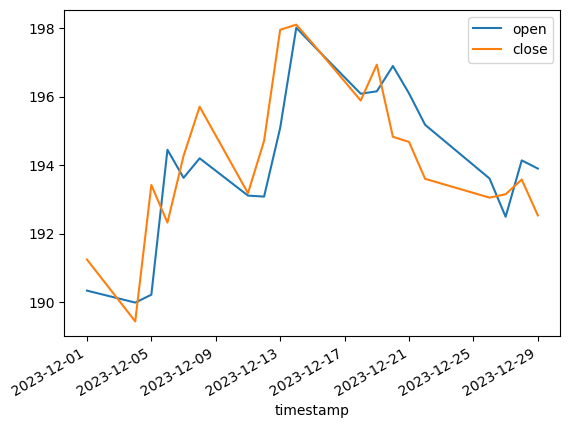

In [86]:
# last 30 days 
stock_data_df[['open','close']].loc['2023-12-01':'2023-12-29'].plot()

stock_data_df.hvplot.area(y=['open','close'])
